In [20]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [21]:
data = pd.read_json('merged_gen_data.json')

data

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.000000
1,2020-05-15 00:15:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.000000
2,2020-05-15 00:30:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.000000
3,2020-05-15 00:45:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.000000
4,2020-05-15 01:00:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
68279,2020-06-17 17:45:00,4135001,zVJPv84UY57bAof,958.857143,93.142857,5874.428571,7363236.429,4135001,HmiyD2TTLFNqkNe,24.174170,25.950272,0.065259
68280,2020-06-17 18:00:00,4135001,zVJPv84UY57bAof,603.000000,58.414286,5892.000000,7363254.000,4135001,HmiyD2TTLFNqkNe,24.130349,25.080925,0.041940
68281,2020-06-17 18:15:00,4135001,zVJPv84UY57bAof,340.250000,32.862500,5903.750000,7363265.750,4135001,HmiyD2TTLFNqkNe,24.038157,24.068250,0.023446
68282,2020-06-17 18:30:00,4135001,zVJPv84UY57bAof,77.714286,7.485714,5909.142857,7363271.143,4135001,HmiyD2TTLFNqkNe,23.840239,22.968658,0.007007


In [22]:
final_df = data.drop(columns=['DATE_TIME','PLANT_ID_x','PLANT_ID_y','SOURCE_KEY_y'])
final_df = final_df.rename(columns={'SOURCE_KEY_x': 'SOURCE_KEY'})
final_df

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000,25.184316,22.857507,0.000000
1,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000,25.084589,22.761668,0.000000
2,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000,24.935753,22.592306,0.000000
3,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000,24.846130,22.360852,0.000000
4,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000,24.621525,22.165423,0.000000
...,...,...,...,...,...,...,...,...
68279,zVJPv84UY57bAof,958.857143,93.142857,5874.428571,7363236.429,24.174170,25.950272,0.065259
68280,zVJPv84UY57bAof,603.000000,58.414286,5892.000000,7363254.000,24.130349,25.080925,0.041940
68281,zVJPv84UY57bAof,340.250000,32.862500,5903.750000,7363265.750,24.038157,24.068250,0.023446
68282,zVJPv84UY57bAof,77.714286,7.485714,5909.142857,7363271.143,23.840239,22.968658,0.007007


In [23]:
#For this analysis, I will use one example inverter
example_df = final_df[final_df['SOURCE_KEY'] == "1BY6WEcLGh8j5v7"]

example_df

,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000,25.184316,22.857507,0.000000
1,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000,25.084589,22.761668,0.000000
2,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000,24.935753,22.592306,0.000000
3,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000,24.846130,22.360852,0.000000
4,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000,24.621525,22.165423,0.000000
...,...,...,...,...,...,...,...,...
3099,1BY6WEcLGh8j5v7,6298.000000,617.037500,1329.375000,6481127.375,25.957446,38.814911,0.454355
3100,1BY6WEcLGh8j5v7,6747.000000,660.842857,1488.714286,6481286.714,26.182827,40.228129,0.501060
3101,1BY6WEcLGh8j5v7,6404.500000,627.412500,1657.750000,6481455.750,26.470134,41.115753,0.464914
3102,1BY6WEcLGh8j5v7,6260.571429,613.085714,1787.857143,6481585.857,26.236733,37.096722,0.450858


In [24]:
#Targets
dc = example_df['DC_POWER']
ac = example_df['AC_POWER']
daily_yield = example_df['DAILY_YIELD']

#Vars
amb_temp = example_df[['AMBIENT_TEMPERATURE']]
mod_temp = example_df[['MODULE_TEMPERATURE']]
irrad = example_df[['IRRADIATION']]

dc.shape, ac.shape, daily_yield.shape, amb_temp.shape, mod_temp.shape, irrad.shape

((3104,), (3104,), (3104,), (3104, 1), (3104, 1), (3104, 1))

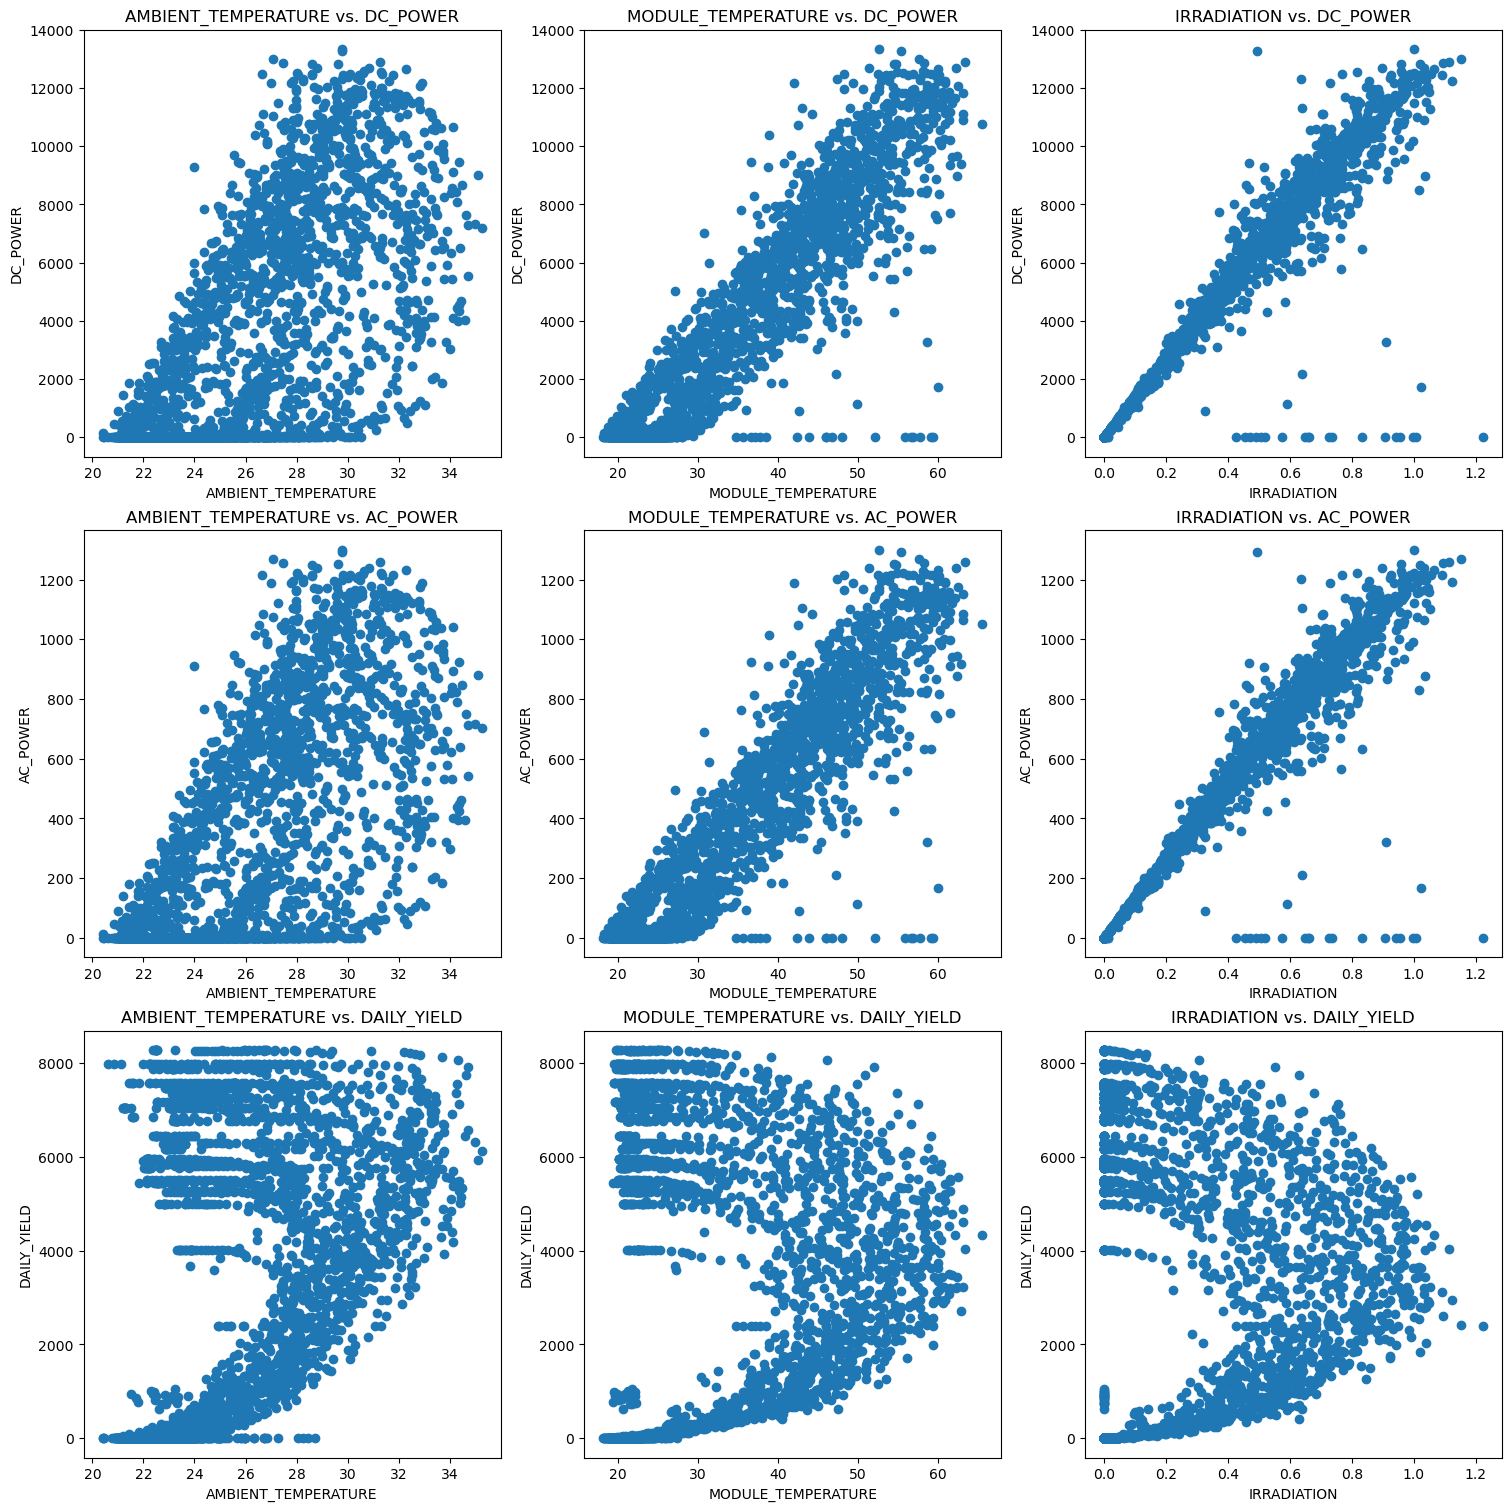

In [25]:
targets = ['DC_POWER', 'AC_POWER', 'DAILY_YIELD']
variables = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), constrained_layout=True)
for row, target in enumerate(targets):
    for col, variable in enumerate(variables):
        axes[row, col].scatter(example_df[variable], example_df[target])
        axes[row, col].set_xlabel(variable)
        axes[row, col].set_ylabel(target)
        axes[row, col].set_title(f'{variable} vs. {target}')

plt.show()

In [26]:
#We will aggregate averages for DAILY_YIELD regressions to model linear relationships
avg_data = data[data['SOURCE_KEY_x'] == "1BY6WEcLGh8j5v7"]

avg_data['DATE'] = pd.to_datetime(avg_data['DATE_TIME']).dt.date

daily_averages = avg_data.groupby('DATE').agg({
    'AMBIENT_TEMPERATURE': 'mean',
    'MODULE_TEMPERATURE': 'mean',
    'IRRADIATION': 'mean',
    'DAILY_YIELD': 'mean'
}).reset_index()

daily_average = daily_averages.drop(columns='DATE')

daily_average


C:\Users\Jared\AppData\Local\Temp\ipykernel_31048\1571527162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_data['DATE'] = pd.to_datetime(avg_data['DATE_TIME']).dt.date


,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAILY_YIELD
0,27.430823,32.582964,0.204699,2641.120776
1,26.780538,31.858851,0.211951,3380.406047
2,26.686727,32.740435,0.238869,3473.035714
3,23.850938,27.814344,0.159026,2271.423549
4,25.338021,29.725163,0.194031,3087.064900
5,25.150683,29.783704,0.240073,3155.774279
6,27.941912,37.964812,0.362403,5266.323535
7,26.526703,32.478885,0.230408,3356.129650
8,26.895118,34.956976,0.293333,4073.705123
9,27.625116,33.978544,0.259762,3702.991443


IndexError: index 3 is out of bounds for axis 0 with size 3

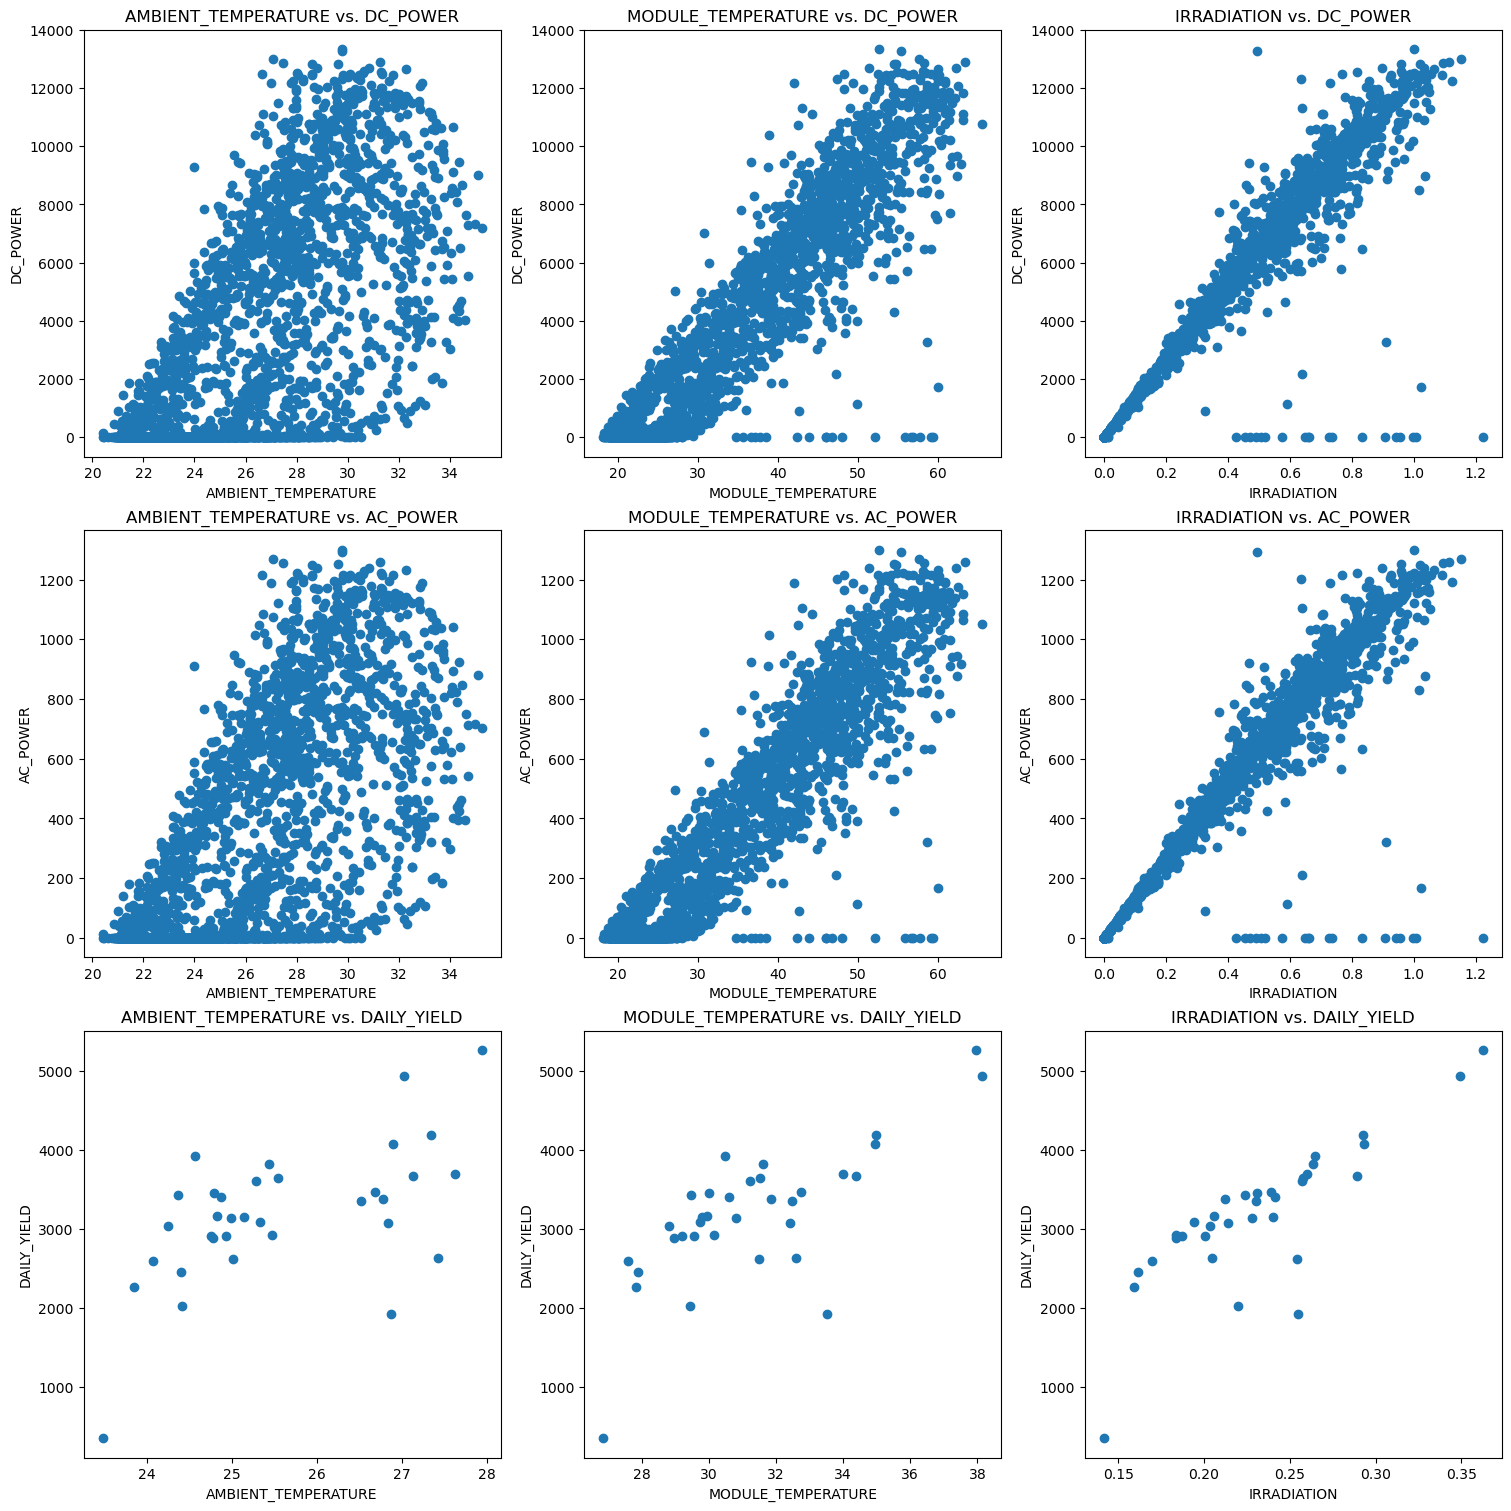

In [28]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), constrained_layout=True)
for row, target in enumerate(targets + ['DAILY_YIELD']):  # Adding DAILY_YIELD for the last row
    for col, variable in enumerate(variables):
        if target in ['DC_POWER', 'AC_POWER']:  # Use original dataset for the first two rows
            axes[row, col].scatter(example_df[variable], example_df[target])
        else:  # Use daily averages for the last row
            axes[row, col].scatter(daily_averages[variable], daily_averages['DAILY_YIELD'])
        axes[row, col].set_xlabel(variable)
        axes[row, col].set_ylabel(target)
        axes[row, col].set_title(f'{variable} vs. {target}')

plt.show()

In [ ]:
def ols(x,y):
    x_constant = sm.add_constant(x)
    model = sm.OLS(y,x_constant)
    result = model.fit()
    return result.summary()

summaries = {}

for target in ['DC_POWER', 'AC_POWER']:
    for var in variables:
        key = f'{var} vs. {target}'
        summaries[key] = ols(example_df[[var]], example_df[target])

for var in variables:
    key = f'{var} vs. DAILY_YIELD'
    summaries[key] = ols(daily_average[[var]], daily_average['DAILY_YIELD'])

for summary in summaries:
    print(summaries[summary])
        

                            OLS Regression Results                            
Dep. Variable:               DC_POWER   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     3229.
Date:                Mon, 08 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:32:32   Log-Likelihood:                -28851.
No. Observations:                3104   AIC:                         5.771e+04
Df Residuals:                    3102   BIC:                         5.772e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.756e+04    

IndexError: index 3 is out of bounds for axis 0 with size 3

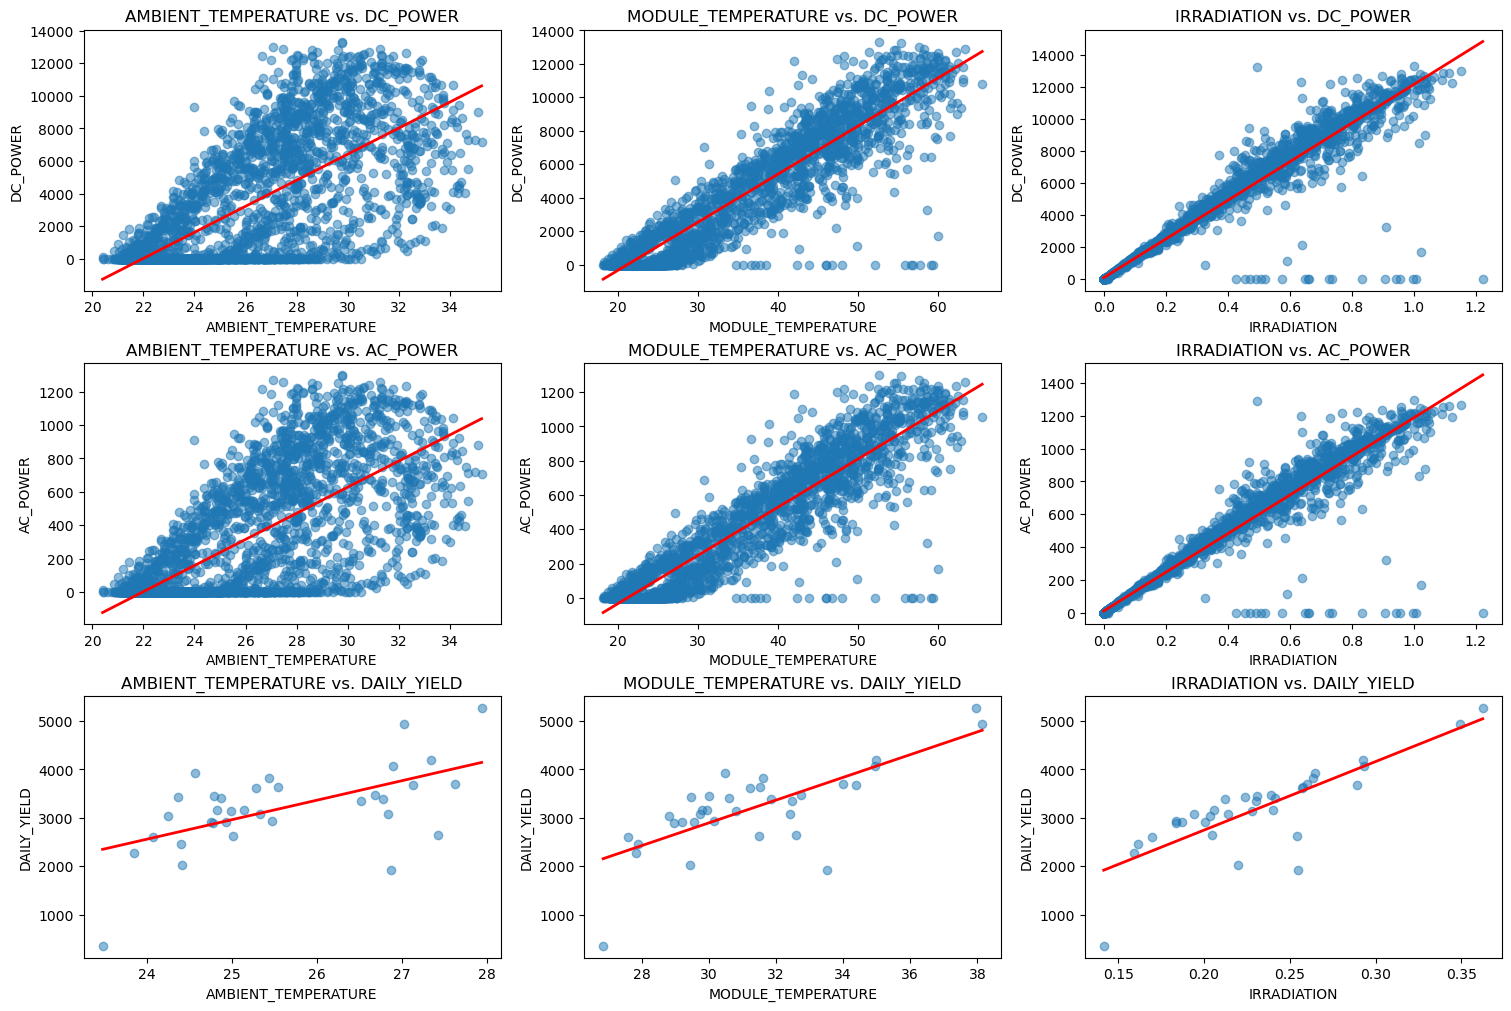

In [ ]:
models = []
models_daily_yield = []
fig, axes = plt.subplots(len(targets), len(variables), figsize=(15, 10), constrained_layout=True)

for i, target in enumerate(targets + ['DAILY_YIELD']):  
    for j, variable in enumerate(variables):
        if target in ['DC_POWER', 'AC_POWER']: 
            X = example_df[[variable]]
            y = example_df[target]
        else:  
            X = daily_averages[[variable]]
            y = daily_averages['DAILY_YIELD']
            
        X_constant = sm.add_constant(X)
        
       
        model = sm.OLS(y, X_constant).fit()
        if target == 'DAILY_YIELD':
            models_daily_yield.append(model)  
        
   
        x_range = pd.DataFrame({variable: np.linspace(X[variable].min(), X[variable].max(), 100)})
        x_range_constant = sm.add_constant(x_range)
        predictions = model.predict(x_range_constant)
        
       
        axes[i, j].scatter(X[variable], y, alpha=0.5)
        
        
        axes[i, j].plot(x_range, predictions, color='red', linewidth=2)
        
        axes[i, j].set_title(f'{variable} vs. {target}')
        axes[i, j].set_xlabel(variable)
        axes[i, j].set_ylabel(target)

plt.show()